The detailed Perceptron mechanisms see in assignment 2 this course and assignment we're going to use existing frameworks to impliment the perceptron and feedforward neural networks.

sklearn and iris dataset--the small and classic dataset for machine learning, shows the basic of the a dataset has--features, labels and samples

In [22]:
from sklearn.datasets import load_iris
iris=load_iris()
print(iris.data.shape)
iris

(150, 4)


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [23]:
import pandas as pd
# Create a DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add the target column
df['target'] = iris.target

# Display the first few rows
print(df) # df.head() / df.tail()

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  

Example of using sklearn

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.0


C:\Users\leonh\OneDrive\Dokumenty\skola\Ing\2.semestr\neuron\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


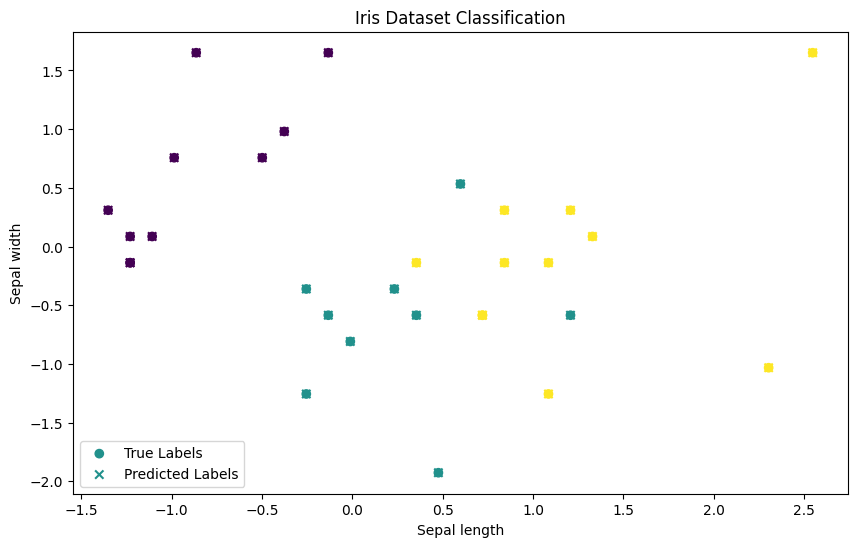

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (important for neural networks)
scaler = StandardScaler() # MinMaxScaler() (Normalization)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build and train the neural network
mlp = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam', max_iter=500, random_state=42) # MLPClassifier(hidden_layer_sizes=(10, 20,10) 3 hidden layers and their neuron numbers
# loss cross entropy for classifier and MSE for MLPRegressor
mlp.fit(X_train, y_train)

# Make predictions
y_pred = mlp.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Plot some of the test results
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='o', label='True Labels')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, marker='x', label='Predicted Labels')
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title('Iris Dataset Classification')
plt.legend()
plt.show()


Cross-entropy loss is a common loss function used in classification tasks, especially in neural networks. It measures the difference between two probability distributions: the predicted probabilities (output by the model) and the true distribution (ground truth labels). The goal of training is to minimize this loss, which corresponds to making the predicted probabilities as close as possible to the true distribution.

(For binary classification)Binary Cross-Entropy Loss = (-1/n)∑[y_i.log(p_i)+(1-y_i).log(1-p_i)]
Where

n: Number of samples.

y_i: True label for sample i (0 or 1).

p_i: Predicted probability for sample i (between 0 and 1).

(For multi-class classification)Categorical Cross-Entropy Loss = (-1/n)∑∑y_i_c.log(p_i_c)

Where:

n: Number of samples.
c: Number of classes.
y_i_c: True label for sample i and class c (one-hot encoded: 1 if the sample belongs to class c, otherwise 0).
p_i_c: Predicted probability for sample i and class c.

Why Use Cross-Entropy?

It penalizes incorrect predictions more heavily when the predicted probability is far from the true label.

It works well with softmax activation in the output layer, which converts raw scores (logits) into probabilities.

Step 1: Binary Cross-Entropy (From Scratch)

In [25]:
import numpy as np

def binary_cross_entropy_loss(y_true, y_pred):
    """
    Compute binary cross-entropy loss manually.

    Parameters:
        y_true (numpy array): True labels (0 or 1), shape (N,).
        y_pred (numpy array): Predicted probabilities (between 0 and 1), shape (N,).

    Returns:
        float: Mean binary cross-entropy loss.
    """
    epsilon = 1e-7  # Small value to avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Clip values to prevent numerical instability
    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss

# Example Usage
y_true = np.array([1, 0, 1, 1, 0])  # True labels
y_pred = np.array([0.9, 0.1, 0.8, 0.7, 0.2])  # Predicted probabilities

loss = binary_cross_entropy_loss(y_true, y_pred)
print(f"Manually Calculated Binary Cross-Entropy Loss: {loss:.4f}")

Manually Calculated Binary Cross-Entropy Loss: 0.2027


Step 2: Categorical Cross-Entropy (From Scratch)

In [26]:
def categorical_cross_entropy_loss(y_true, y_pred):
    """
    Compute categorical cross-entropy loss manually.

    Parameters:
        y_true (numpy array): True labels (one-hot encoded), shape (N, C).
        y_pred (numpy array): Predicted probabilities, shape (N, C).

    Returns:
        float: Mean categorical cross-entropy loss.
    """
    epsilon = 1e-7  # Small value to avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Clip values to prevent numerical instability
    loss = -np.mean(np.sum(y_true * np.log(y_pred), axis=1))  # Sum over classes, then mean over samples
    return loss

# Example Usage
y_true = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])  # One-hot encoded true labels
y_pred = np.array([[0.8, 0.1, 0.1], [0.2, 0.7, 0.1], [0.1, 0.2, 0.7]])  # Predicted probabilities

loss = categorical_cross_entropy_loss(y_true, y_pred)
print(f"Manually Calculated Categorical Cross-Entropy Loss: {loss:.4f}")

Manually Calculated Categorical Cross-Entropy Loss: 0.3122


Step 3: Comparison with PyTorch's Built-In Loss Functions

In [27]:
import torch
import torch.nn as nn

# Binary Cross-Entropy Loss in PyTorch
bce_loss_fn = nn.BCELoss()  # Binary Cross-Entropy Loss
y_true_tensor = torch.tensor([1.0, 0.0, 1.0, 1.0, 0.0])  # True labels
y_pred_tensor = torch.tensor([0.9, 0.1, 0.8, 0.7, 0.2])  # Predicted probabilities
bce_loss = bce_loss_fn(y_pred_tensor, y_true_tensor)
print(f"PyTorch Binary Cross-Entropy Loss: {bce_loss.item():.4f}")

# Categorical Cross-Entropy Loss in PyTorch
cce_loss_fn = nn.CrossEntropyLoss()  # Categorical Cross-Entropy Loss
y_true_tensor = torch.tensor([0, 1, 2])  # Class indices (not one-hot encoded)
y_pred_tensor = torch.tensor([[2.0, -1.0, -1.0], [-1.0, 2.0, -1.0], [-1.0, -1.0, 2.0]])  # Raw logits
cce_loss = cce_loss_fn(y_pred_tensor, y_true_tensor)
print(f"PyTorch Categorical Cross-Entropy Loss: {cce_loss.item():.4f}")

PyTorch Binary Cross-Entropy Loss: 0.2027
PyTorch Categorical Cross-Entropy Loss: 0.0949


The gradient of the loss with respect to the weights w is:

∂w/∂L = (1/N)∑(p_i−y_i)⋅x_i

Where:

p_i-y_i: Difference between predicted probabilities and true labels.

Gradient Descent Update Rule:

w:=w-η⋅∂L/∂w

where:

η: Learning rate.

Adam Optimizer Update Rule:

Adam combines momentum and adaptive learning rates. The update rules are:

1 Compute the first moment (mean of gradients):

m_t= β1⋅m_(t-1)+(1-β1)⋅g_t

2 Compute the second moment (uncentered variance of gradients):

v_t=β2⋅v_(t-1)+(1-β2)⋅(g_t)^2

3 Bias correction:

M_t=m_t/(1-β1_t)

V_t=v_t/(1-β2_t)​

Update the weights:

w:=w-η⋅M_t/((√V_t)+ϵ)

Where:

g_t: Gradient at time step t.

β1,β2: Exponential decay rates for the first and second moments (default: 0.9, 0.999).

ϵ: Small constant to prevent division by zero (default: 1e-8).

Binary Cross-Entropy Loss with Gradient Descent:

In [28]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def binary_cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-7
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss

def gradient_descent_binary(X, y, learning_rate=0.01, epochs=100):
    """
    Perform gradient descent for binary classification using binary cross-entropy loss.

    Parameters:
        X (numpy array): Input features, shape (N, D).
        y (numpy array): True labels (0 or 1), shape (N,).
        learning_rate (float): Learning rate.
        epochs (int): Number of iterations.

    Returns:
        weights (numpy array): Learned weights.
        losses (list): Loss values over epochs.
    """
    N, D = X.shape
    weights = np.zeros(D)  # Initialize weights to zero
    losses = []

    for epoch in range(epochs):
        # Forward pass
        z = np.dot(X, weights)
        y_pred = sigmoid(z)

        # Compute loss
        loss = binary_cross_entropy_loss(y, y_pred)
        losses.append(loss)

        # Compute gradients
        gradients = (1 / N) * np.dot(X.T, (y_pred - y))

        # Update weights
        weights -= learning_rate * gradients

        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

    return weights, losses

# Example Usage
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])  # Input features
y = np.array([0, 0, 1, 1])  # True labels
weights, losses = gradient_descent_binary(X, y, learning_rate=0.1, epochs=100)

Epoch 0, Loss: 0.6931
Epoch 10, Loss: 0.6348
Epoch 20, Loss: 0.6246
Epoch 30, Loss: 0.6146
Epoch 40, Loss: 0.6049
Epoch 50, Loss: 0.5955
Epoch 60, Loss: 0.5863
Epoch 70, Loss: 0.5774
Epoch 80, Loss: 0.5688
Epoch 90, Loss: 0.5604


Categorical Cross-Entropy Loss with Adam Optimizer

In [29]:
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Numerical stability
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def categorical_cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-7
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -np.mean(np.sum(y_true * np.log(y_pred), axis=1))
    return loss

def adam_optimizer_categorical(X, y, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8, epochs=100):
    """
    Perform Adam optimization for multi-class classification using categorical cross-entropy loss.

    Parameters:
        X (numpy array): Input features, shape (N, D).
        y (numpy array): One-hot encoded true labels, shape (N, C).
        learning_rate (float): Learning rate.
        beta1, beta2 (float): Exponential decay rates for Adam.
        epsilon (float): Small constant to prevent division by zero.
        epochs (int): Number of iterations.

    Returns:
        weights (numpy array): Learned weights.
        losses (list): Loss values over epochs.
    """
    N, D = X.shape
    _, C = y.shape
    weights = np.zeros((D, C))  # Initialize weights to zero
    m = np.zeros_like(weights)  # First moment vector
    v = np.zeros_like(weights)  # Second moment vector
    losses = []

    for epoch in range(epochs):
        # Forward pass
        z = np.dot(X, weights)
        y_pred = softmax(z)

        # Compute loss
        loss = categorical_cross_entropy_loss(y, y_pred)
        losses.append(loss)

        # Compute gradients
        gradients = (1 / N) * np.dot(X.T, (y_pred - y))

        # Update first and second moments
        m = beta1 * m + (1 - beta1) * gradients
        v = beta2 * v + (1 - beta2) * gradients**2

        # Bias correction
        m_hat = m / (1 - beta1**(epoch + 1))
        v_hat = v / (1 - beta2**(epoch + 1))

        # Update weights
        weights -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)

        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

    return weights, losses

# Example Usage
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])  # Input features
y = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 0, 0]])  # One-hot encoded true labels
weights, losses = adam_optimizer_categorical(X, y, learning_rate=0.01, epochs=100)

Epoch 0, Loss: 1.0986
Epoch 10, Loss: 1.0432
Epoch 20, Loss: 1.0402
Epoch 30, Loss: 1.0369
Epoch 40, Loss: 1.0335
Epoch 50, Loss: 1.0313
Epoch 60, Loss: 1.0288
Epoch 70, Loss: 1.0263
Epoch 80, Loss: 1.0239
Epoch 90, Loss: 1.0216


# My code

In [30]:
def load_and_preprocess_data():
    iris = load_iris()
    X, y = iris.data, iris.target
    print(f"Number of features: {X.shape[1]}")
    print(f"Number of classes: {len(set(y))}")

    X_perceptron, y_perceptron = X[y < 2], y[y < 2]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_perceptron, y_perceptron, test_size=0.2,
                                                                random_state=42)

    scaler = StandardScaler()
    return {
        "X_train": scaler.fit_transform(X_train), "X_test": scaler.transform(X_test),
        "y_train": y_train, "y_test": y_test,
        "X_train_p": scaler.fit_transform(X_train_p), "X_test_p": scaler.transform(X_test_p),
        "y_train_p": y_train_p, "y_test_p": y_test_p
    }


In [31]:
from sklearn.linear_model import Perceptron


def train_perceptron(X_train_p, X_test_p, y_train_p, y_test_p):
    model = Perceptron()
    model.fit(X_train_p, y_train_p)
    y_pred = model.predict(X_test_p)
    print("Scikit-learn Perceptron:")
    print(classification_report(y_test_p, y_pred))

In [32]:
data = load_and_preprocess_data()
train_perceptron(data['X_train_p'], data['X_test_p'], data['y_train_p'], data['y_test_p'])

Number of features: 4
Number of classes: 3
Scikit-learn Perceptron:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [33]:
def train_sklearn_feedforward(X_train, X_test, y_train, y_test):
    model = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam', max_iter=10000, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Scikit-learn Feedforward NN:")
    print(classification_report(y_test, y_pred))

train_sklearn_feedforward(data['X_train'], data['X_test'], data['y_train'], data['y_test'])

Scikit-learn Feedforward NN:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [34]:
from keras.src.layers import Dense
from keras.src.layers import Dropout
from keras import Sequential

from keras import Input


def train_keras_feedforward(X_train, X_test, y_train, y_test):
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(10, activation='relu'),
        Dropout(0.3),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=30, verbose=0)
    y_pred = np.argmax(model.predict(X_test), axis=1)
    print("Keras Feedforward NN:")
    print(classification_report(y_test, y_pred))

train_keras_feedforward(data['X_train'], data['X_test'], data['y_train'], data['y_test'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Keras Feedforward NN:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       0.38      0.67      0.48         9
           2       0.00      0.00      0.00        11

    accuracy                           0.53        30
   macro avg       0.38      0.56      0.45        30
weighted avg       0.37      0.53      0.43        30



In [35]:
class FeedforwardNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, activation_fn):
        super(FeedforwardNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.activation = activation_fn
        self.dropout = nn.Dropout(0.3)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        out = self.fc1(x)
        out = self.activation(out)
        out = self.dropout(out)
        out = self.fc2(out)
        out = self.softmax(out)
        return out

In [36]:
from torch import optim
from torch.utils.data import TensorDataset
from torch import nn

from torch.utils.data import DataLoader


def train_pytorch_feedforward(X_train, X_test, y_train, y_test, activation, optimizer_type):
    X_train_torch = torch.tensor(X_train, dtype=torch.float32)
    y_train_torch = torch.tensor(y_train, dtype=torch.long)
    X_test_torch = torch.tensor(X_test, dtype=torch.float32)
    y_test_torch = torch.tensor(y_test, dtype=torch.long)

    dataset = TensorDataset(X_train_torch, y_train_torch)
    dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

    model = FeedforwardNN(X_train.shape[1], 10, 3, activation)
    criterion = nn.CrossEntropyLoss()

    if optimizer_type == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=0.01)
    elif optimizer_type == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
    else:
        raise ValueError(f'Unknown optimizer: {optimizer_type}')

    for epoch in range(30):
        for batch in dataloader:
            inputs, labels = batch
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    y_pred = torch.argmax(model(X_test_torch), axis=1).detach().cpu().numpy()
    y_true = y_test_torch.detach().cpu().numpy()
    print(classification_report(y_true, y_pred))


In [37]:
print("PyTorch Feedforward NN (Activation: ReLU, Optimizer: Adam):")
train_pytorch_feedforward(data['X_train'], data['X_test'], data['y_train'], data['y_test'], nn.ReLU(),"Adam")

PyTorch Feedforward NN (Activation: ReLU, Optimizer: Adam):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [38]:
print("PyTorch Feedforward NN (Activation: ReLU, Optimizer: SGD):")
train_pytorch_feedforward(data['X_train'], data['X_test'], data['y_train'], data['y_test'], nn.ReLU(),"SGD")

PyTorch Feedforward NN (Activation: ReLU, Optimizer: SGD):
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.75      0.67      0.71         9
           2       0.77      0.91      0.83        11

    accuracy                           0.83        30
   macro avg       0.84      0.83      0.83        30
weighted avg       0.84      0.83      0.83        30



In [39]:
print("PyTorch Feedforward NN (Activation: Sigmoid, Optimizer: Adam):")
train_pytorch_feedforward(data['X_train'], data['X_test'], data['y_train'], data['y_test'], nn.Sigmoid(),"Adam")

PyTorch Feedforward NN (Activation: Sigmoid, Optimizer: Adam):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



In [40]:
print("PyTorch Feedforward NN (Activation: Sigmoid, Optimizer: SGD):")
train_pytorch_feedforward(data['X_train'], data['X_test'], data['y_train'], data['y_test'], nn.Sigmoid(),"SGD")

PyTorch Feedforward NN (Activation: Sigmoid, Optimizer: SGD):
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.60      0.33      0.43         9
           2       0.60      0.82      0.69        11

    accuracy                           0.70        30
   macro avg       0.70      0.68      0.67        30
weighted avg       0.70      0.70      0.68        30



In [41]:
print("PyTorch Feedforward NN (Activation: Tanh, Optimizer: Adam):")
train_pytorch_feedforward(data['X_train'], data['X_test'], data['y_train'], data['y_test'], nn.Tanh(),"Adam")

PyTorch Feedforward NN (Activation: Tanh, Optimizer: Adam):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [42]:
print("PyTorch Feedforward NN (Activation: Tanh, Optimizer: SGD):")
train_pytorch_feedforward(data['X_train'], data['X_test'], data['y_train'], data['y_test'], nn.Tanh(),"SGD")

PyTorch Feedforward NN (Activation: Tanh, Optimizer: SGD):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



# Summary
## 1) What’s the difference between perceptron and feedforward network?
A perceptron is a simple binary classifier that can only handle linearly separable data.
A feedforward neural network has multiple layers, uses non-linear activation functions, and can learn complex patterns in data.

## 2) Sklearn, Keras, and PyTorch – which is the best?
It depends on the specific use case and requirements.
Scikit-learn is great for traditional machine learning tasks and has a wide range of algorithms.
Keras is user-friendly and designed for quick prototyping of neural networks.
PyTorch is more flexible and widely used in research and production settings.

## 3) Which optimizers were used and why?
Adam and SGD optimizers were used in the PyTorch implementation.
Adam - Fast and adaptive, but can get stuck in suboptimal solutions
SGD - Slower, but can generalize better

